# Classical Two Bit Adder Challenge
Goals:
- Build a binary two-bit adder using quantum logic gates

$
\begin{array}{|c|c|c|c|}
\hline
    \text{Input}&&\text{Output}& \\
\hline
    \text{A} & \text{B} & \text{Sum} &\text{Carry-Out} \\
\hline
    \ket{0}&\ket{0} & \ket{0}&\ket{0} \\
\hline
    \ket{0}&\ket{1} & \ket{1}&\ket{0} \\
\hline
    \ket{1}&\ket{0} & \ket{1}&\ket{0} \\
\hline
    \ket{1}&\ket{1} & \ket{0}&\ket{1} \\
\hline
\end{array}
$

For this system we will use 4 qubits where, our input qubits are the first 2 qubits and the second 2 qubits are used for our output measurements. 
<br>
We will use an X gate to flip our input bits into one of the 4 possible input states.

## Attempt:
After we have our inputs, the input qubits should remain unchanged and all operations should be done on the last 2 qubits using the first 2 as controls.
<br>
<br>
When our input qubits are both $\ket{0}$, we do not need to apply any gates to the system to get the correct answer. 
<br>
We will measure the output qubits as $\ket{0}$ and $\ket{0}$.
<br>
<br>
When either, but not both, qubits are $\ket{1}$, we need the third qubit to become $\ket{1}$. We can accomplish this by adding 2 CX gates. 
<br>
The first CX gate's control is the first qubit and target is the third qubit.
<br>
The second CX gates's control is the second qubit and target is the third qubit. 
<br>
When either input qubit is $\ket{1}$, our output qubits will be $\ket{1}$ and $\ket{0}$.
<br>
<br>
When both input qubits are $\ket{1}$, the third qubit should be $\ket{0}$ and fourth qubit should be $\ket{1}$.
<br>
Using the CX gates from above, the third qubit will be swapped back to $\ket{0}$ when both input qubits are $\ket{1}$, so no changes to the third qubit are needed.
<br>
To make the fourth qubit flip to $\ket{1}$ when the input qubits are both $\ket{1}$, we can use a CCX gate!
<br>
The controls of the CCX gate are the input qubits and the target qubit is the last qubit. 
<br>
When both input qubits are $\ket{1}$, our output qubits will be $\ket{0}$ and $\ket{1}$

In [93]:
from qiskit import * 
from qiskit_aer import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

Uncomment the X gates in the code to flip the state of our two input qubits and try the different possible input combinations.
<br>
Check out the output results in the bloch spheres of the last 2 qubits given the input of our first 2 qubits.
<br>
It works!

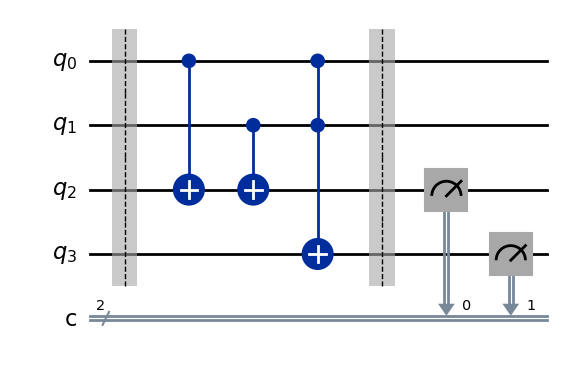

In [94]:
circuit = QuantumCircuit(4, 2)
# circuit.x(0) # Uncomment to flip first qubit's state to 1
# circuit.x(1) # Uncomment to flip second qubit's state to 1
circuit.barrier()

# Solution Implementation 
circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(2, 0)
circuit.measure(3, 1)
circuit.draw(output='mpl');

In [95]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

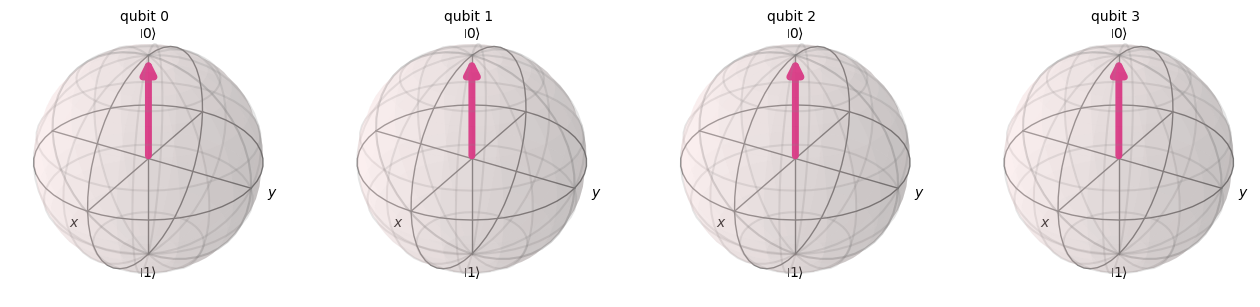

In [96]:
plot_bloch_multivector(statevector);